# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 5: Picking up the right tool 

## Challenge 1: Image pre-processing 

In [1]:
from tensorflow.keras.datasets import mnist
(train_d, train_l), (test_d, test_l) = mnist.load_data()

In [2]:
print(train_d.shape)
print(train_l.shape)
print(test_d.shape)
print(test_l.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(train_d[0, :, :])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

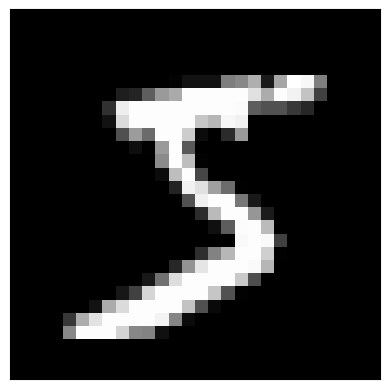

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(train_d[0, :, :], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
import pandas as pd
columns = [f'P{i}' for i in range(28*28)]
columns.extend(['lable'])
feature_df = pd.DataFrame(index=range(60000), columns=columns)
feature_df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,lable
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def reshape_image_ourselve(image):
    output_sr = pd.Series(index=range(28*28))
    for i in range(28):
        output_sr.iloc[28*i:28*(i+1)] = image[i, :]
    return output_sr.values

In [10]:
train_d[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
%%time
feature_df = pd.DataFrame(index=range(60000), columns=[f'P{i}' for i in range(28*28)])
for i in range(60000):
    feature_df.loc[i] = reshape_image_ourselve(train_d[i, :, :])
feature_df['lable'] = train_l
feature_df

CPU times: user 26.7 s, sys: 343 ms, total: 27.1 s
Wall time: 27.2 s


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,lable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [11]:
%%time
feature_df = pd.DataFrame(train_d.reshape(60000, -1), columns=[f'P{i}' for i in range(28*28)])
feature_df['lable'] = train_l
feature_df

CPU times: user 2.6 ms, sys: 255 μs, total: 2.85 ms
Wall time: 2.73 ms


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,lable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


## Challenge 2: Restructuring and reformulating data 

In [12]:
import pandas as pd
order_df = pd.read_csv('US_Shops_simulated.csv')
order_df

,Date,Month,Year,State,Location,number_of_customer_visits,revenue,profit
0,2022-09-30,9,2022,Alabama,Shop1,499,1377.74,27.55
1,2022-09-30,9,2022,Alabama,Shop2,504,3733.13,63.46
2,2022-09-30,9,2022,Alabama,Shop3,759,6155.49,98.49
3,2022-09-30,9,2022,Alabama,Shop4,715,7390.96,369.55
4,2022-09-30,9,2022,Alabama,Shop5,538,6502.27,279.60
...,...,...,...,...,...,...,...,...
5470615,2019-10-02,10,2019,Wyoming,Shop119,476,6968.16,222.98
5470616,2019-10-02,10,2019,Wyoming,Shop120,811,6095.48,176.77
5470617,2019-10-02,10,2019,Wyoming,Shop121,637,1818.64,47.28
5470618,2019-10-02,10,2019,Wyoming,Shop122,612,7336.66,278.79


In [13]:
import pandas as pd
order_df = pd.read_csv('https://www.dropbox.com/scl/fi/pqk74rrr3agvtm8l1ndi4/US_Shops_simulated.csv?rlkey=iz9xx3z1xt6l5cozzrgjxlthl&dl=1')
order_df

,Date,Month,Year,State,Location,number_of_customer_visits,revenue,profit
0,2022-09-30,9,2022,Alabama,Shop1,499,1377.74,27.55
1,2022-09-30,9,2022,Alabama,Shop2,504,3733.13,63.46
2,2022-09-30,9,2022,Alabama,Shop3,759,6155.49,98.49
3,2022-09-30,9,2022,Alabama,Shop4,715,7390.96,369.55
4,2022-09-30,9,2022,Alabama,Shop5,538,6502.27,279.60
...,...,...,...,...,...,...,...,...
5470615,2019-10-02,10,2019,Wyoming,Shop119,476,6968.16,222.98
5470616,2019-10-02,10,2019,Wyoming,Shop120,811,6095.48,176.77
5470617,2019-10-02,10,2019,Wyoming,Shop121,637,1818.64,47.28
5470618,2019-10-02,10,2019,Wyoming,Shop122,612,7336.66,278.79


In [15]:
shop_index = order_df.groupby(['State', 'Location']).size().index
print(shop_index)

MultiIndex([('Alabama',  'Shop1'),
            ('Alabama', 'Shop10'),
            ('Alabama', 'Shop11'),
            ('Alabama', 'Shop12'),
            ('Alabama', 'Shop13'),
            ('Alabama', 'Shop14'),
            ('Alabama', 'Shop15'),
            ('Alabama', 'Shop16'),
            ('Alabama', 'Shop17'),
            ('Alabama', 'Shop18'),
            ...
            ('Wyoming', 'Shop90'),
            ('Wyoming', 'Shop91'),
            ('Wyoming', 'Shop92'),
            ('Wyoming', 'Shop93'),
            ('Wyoming', 'Shop94'),
            ('Wyoming', 'Shop95'),
            ('Wyoming', 'Shop96'),
            ('Wyoming', 'Shop97'),
            ('Wyoming', 'Shop98'),
            ('Wyoming', 'Shop99')],
           names=['State', 'Location'], length=4996)


In [17]:
date_index = order_df.groupby(['Date']).size().index
print(date_index)

Index(['2019-10-02', '2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06',
       '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11',
       ...
       '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
       '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30'],
      dtype='object', name='Date', length=1095)


In [18]:
rev_shop_df = pd.DataFrame(index=shop_index, columns=date_index)
rev_shop_df

Date             2019-10-02 2019-10-03 2019-10-04 2019-10-05 2019-10-06  \
State   Location                                                          
Alabama Shop1           NaN        NaN        NaN        NaN        NaN   
        Shop10          NaN        NaN        NaN        NaN        NaN   
        Shop11          NaN        NaN        NaN        NaN        NaN   
        Shop12          NaN        NaN        NaN        NaN        NaN   
        Shop13          NaN        NaN        NaN        NaN        NaN   
...                     ...        ...        ...        ...        ...   
Wyoming Shop95          NaN        NaN        NaN        NaN        NaN   
        Shop96          NaN        NaN        NaN        NaN        NaN   
        Shop97          NaN        NaN        NaN        NaN        NaN   
        Shop98          NaN        NaN        NaN        NaN        NaN   
        Shop99          NaN        NaN        NaN        NaN        NaN   

Date             2019-10-07 2019-10-08 2019-10-09 2019-10-10 2019-10-11  ...  \
State   Location                                                         ...   
Alabama Shop1           NaN        NaN        NaN        NaN        NaN  ...   
        Shop10          NaN        NaN        NaN        NaN        NaN  ...   
        Shop11          NaN        NaN        NaN        NaN        NaN  ...   
        Shop12          NaN        NaN        NaN        NaN        NaN  ...   
        Shop13          NaN        NaN        NaN        NaN        NaN  ...   
...                     ...        ...        ...        ...        ...  ...   
Wyoming Shop95          NaN        NaN        NaN        NaN        NaN  ...   
        Shop96          NaN        NaN        NaN        NaN        NaN  ...   
        Shop97          NaN        NaN        NaN        NaN        NaN  ...   
        Shop98          NaN        NaN        NaN        NaN        NaN  ...   
        Shop99          NaN        NaN        NaN        NaN        NaN  ...   

Date             2022-09-21 2022-09-22 2022-09-23 2022-09-24 2022-09-25  \
State   Location                                                          
Alabama Shop1           NaN        NaN        NaN        NaN        NaN   
        Shop10          NaN        NaN        NaN        NaN        NaN   
        Shop11          NaN        NaN        NaN        NaN        NaN   
        Shop12          NaN        NaN        NaN        NaN        NaN   
        Shop13          NaN        NaN        NaN        NaN        NaN   
...                     ...        ...        ...        ...        ...   
Wyoming Shop95          NaN        NaN        NaN        NaN        NaN   
        Shop96          NaN        NaN        NaN        NaN        NaN   
        Shop97          NaN        NaN        NaN        NaN        NaN   
        Shop98          NaN        NaN        NaN        NaN        NaN   
        Shop99          NaN        NaN        NaN        NaN        NaN   

Date             2022-09-26 2022-09-27 2022-09-28 2022-09-29 2022-09-30  
State   Location                                                         
Alabama Shop1           NaN        NaN        NaN        NaN        NaN  
        Shop10          NaN        NaN        NaN        NaN        NaN  
        Shop11          NaN        NaN        NaN        NaN        NaN  
        Shop12          NaN        NaN        NaN        NaN        NaN  
        Shop13          NaN        NaN        NaN        NaN        NaN  
...                     ...        ...        ...        ...        ...  
Wyoming Shop95          NaN        NaN        NaN        NaN        NaN  
        Shop96          NaN        NaN        NaN        NaN        NaN  
        Shop97          NaN        NaN        NaN        NaN        NaN  
        Shop98          NaN        NaN        NaN        NaN        NaN  
        Shop99          NaN        NaN        NaN        NaN        NaN  

[4996 rows x 1095 columns]

In [19]:
%%time
for state,location in shop_index:
    wdf = (order_df
           .query(f'State == "{state}"')
           .query(f'Location == "{location}"')
           .copy()
    )
    rev_shop_df.loc[state,location] = (
        wdf.set_index('Date').number_of_customer_visits)
rev_shop_df

CPU times: user 3min 47s, sys: 21.7 s, total: 4min 8s
Wall time: 4min 15s


Date             2019-10-02 2019-10-03 2019-10-04 2019-10-05 2019-10-06  \
State   Location                                                          
Alabama Shop1           837        519        233        478        549   
        Shop10          308        133        155        273        373   
        Shop11          837        454        544        162        432   
        Shop12          154        464        704        361        952   
        Shop13          361        155        806        873        469   
...                     ...        ...        ...        ...        ...   
Wyoming Shop95          302        513        865        195        675   
        Shop96          101        391        987        755        287   
        Shop97          975        285        577        852        738   
        Shop98          240        782        168        727        224   
        Shop99          943        127        377        884        682   

Date             2019-10-07 2019-10-08 2019-10-09 2019-10-10 2019-10-11  ...  \
State   Location                                                         ...   
Alabama Shop1           363        351        262        701        352  ...   
        Shop10          158        690        359        859        344  ...   
        Shop11          733        249        282        890        587  ...   
        Shop12          421        665        500        219        169  ...   
        Shop13          224        178        868        568        269  ...   
...                     ...        ...        ...        ...        ...  ...   
Wyoming Shop95          977        971        413        943        973  ...   
        Shop96          380        693        534        840        957  ...   
        Shop97          672        664        589        730        978  ...   
        Shop98          841        224        576        638        412  ...   
        Shop99          715        330        433        494        388  ...   

Date             2022-09-21 2022-09-22 2022-09-23 2022-09-24 2022-09-25  \
State   Location                                                          
Alabama Shop1           277        544        347        666        734   
        Shop10          836        744        461        206        424   
        Shop11          689        714        202        282        193   
        Shop12          148        818        654        121        867   
        Shop13          535        893        837        411        490   
...                     ...        ...        ...        ...        ...   
Wyoming Shop95          572        542        274        309        917   
        Shop96          191        525        373        576        987   
        Shop97          960        703        437        241        578   
        Shop98          296        672        814        437        792   
        Shop99          249        975        467        130        680   

Date             2022-09-26 2022-09-27 2022-09-28 2022-09-29 2022-09-30  
State   Location                                                         
Alabama Shop1           368        340        374        418        499  
        Shop10          488        791        100        844        983  
        Shop11          256        887        365        127        924  
        Shop12          400        439        647        485        634  
        Shop13          964        690        543        100        450  
...                     ...        ...        ...        ...        ...  
Wyoming Shop95          493        349        132        378        138  
        Shop96          316        949        191        411        953  
        Shop97          348        864        619        548        578  
        Shop98          305        449        882        308        205  
        Shop99          171        375        206        851        331  

[4996 rows x 1095 columns]

In [20]:
%%time
shop_df = (
    order_df
    .drop(columns=['Month', 'Year'])
    .set_index(['State', 'Location', 'Date'])
    .unstack()
)
shop_df

CPU times: user 1.25 s, sys: 176 ms, total: 1.43 s
Wall time: 1.46 s


number_of_customer_visits                                   \
Date                            2019-10-02 2019-10-03 2019-10-04 2019-10-05   
State   Location                                                              
Alabama Shop1                          837        519        233        478   
        Shop10                         308        133        155        273   
        Shop11                         837        454        544        162   
        Shop12                         154        464        704        361   
        Shop13                         361        155        806        873   
...                                    ...        ...        ...        ...   
Wyoming Shop95                         302        513        865        195   
        Shop96                         101        391        987        755   
        Shop97                         975        285        577        852   
        Shop98                         240        782        168        727   
        Shop99                         943        127        377        884   

                                                                         \
Date             2019-10-06 2019-10-07 2019-10-08 2019-10-09 2019-10-10   
State   Location                                                          
Alabama Shop1           549        363        351        262        701   
        Shop10          373        158        690        359        859   
        Shop11          432        733        249        282        890   
        Shop12          952        421        665        500        219   
        Shop13          469        224        178        868        568   
...                     ...        ...        ...        ...        ...   
Wyoming Shop95          675        977        971        413        943   
        Shop96          287        380        693        534        840   
        Shop97          738        672        664        589        730   
        Shop98          224        841        224        576        638   
        Shop99          682        715        330        433        494   

                             ...     profit                                   \
Date             2019-10-11  ... 2022-09-21 2022-09-22 2022-09-23 2022-09-24   
State   Location             ...                                               
Alabama Shop1           352  ...       8.87     255.61     115.84     220.68   
        Shop10          344  ...      96.02      80.16     215.60      14.63   
        Shop11          587  ...      62.20      46.36      21.32      94.82   
        Shop12          169  ...      12.04     187.34     197.65      83.18   
        Shop13          269  ...      46.00     291.97     460.52      93.61   
...                     ...  ...        ...        ...        ...        ...   
Wyoming Shop95          973  ...     181.28      70.13      23.35     148.37   
        Shop96          957  ...      49.95      42.23     262.93     316.60   
        Shop97          978  ...     570.96     136.14      40.29     115.45   
        Shop98          412  ...       6.02      79.85     180.08     172.95   
        Shop99          388  ...      13.89     137.50     292.02      18.89   

                                                                         \
Date             2022-09-25 2022-09-26 2022-09-27 2022-09-28 2022-09-29   
State   Location                                                          
Alabama Shop1        151.33     156.96      70.63      18.77      69.95   
        Shop10        33.89      11.36     335.82       2.77     445.96   
        Shop11        20.06      89.73     353.26      62.86      19.36   
        Shop12       197.14     266.99     207.88     264.04     237.32   
        Shop13        72.41     310.95     102.98      87.58       3.44   
...                     ...        ...        ...        ...        ...   
Wyoming Shop95       155.46     314.57      50.81      19.26   

## Challenge 3: Restructuring and Reformulating Data – Second Case Study

In [21]:
import pandas as pd
news_df = pd.read_csv('stock_news.csv')
news_df

,Unnamed: 0,Title,DateTime,Positive,Negative,Neutral,Entities,DateTime_Hour,Ticker
0,0,"Market Tumbles as VCLT, SPY, and CMCSA Stocks ...",2023-01-01 01:18:00,0.05,0.78,0.17,"['VCLT', 'SPY', 'CMCSA']",2023-01-01 01:00:00,"['VCLT', 'SPY', 'CMCSA']"
1,1,Tech stocks tumble as QQQ and META hit new low...,2023-01-01 01:27:00,0.24,0.26,0.50,"['QQQ', 'SCHP', 'META', 'BG', 'APA', 'YXI', 'V...",2023-01-01 01:00:00,"['QQQ', 'SCHP', 'META', 'BG', 'APA', 'YXI', 'V..."
2,2,Tech Giant NVDA Faces Lawsuit Over Patent Infr...,2023-01-01 01:40:00,0.03,0.72,0.25,"['NVDA', 'XMLV', 'SJB', 'FLOT', 'AIVL', 'SPY',...",2023-01-01 01:00:00,"['NVDA', 'XMLV', 'SJB', 'FLOT', 'AIVL', 'SPY',..."
3,3,FAB Inc. announces record-breaking revenue but...,2023-01-01 01:56:00,0.25,0.06,0.69,['FAB'],2023-01-01 01:00:00,['FAB']
4,4,Tech Giants MSFT and XLK Experience Minor Down...,2023-01-01 02:06:00,0.20,0.03,0.77,"['EUM', 'PCY', 'SPHQ', 'SUSA', 'EPV', 'SHV', '...",2023-01-01 02:00:00,"['EUM', 'PCY', 'SPHQ', 'SUSA', 'EPV', 'SHV', '..."
...,...,...,...,...,...,...,...,...,...
38265,38265,Oil prices plunge leading to major losses for ...,2023-12-29 23:01:00,0.01,0.97,0.02,"['SWK', 'META', 'NWL', 'OKE', 'DIG', 'EDZ']",2023-12-29 23:00:00,"['SWK', 'META', 'NWL', 'OKE', 'DIG', 'EDZ']"
38266,38266,Tech Giants Face Regulatory Scrutiny Leading t...,2023-12-29 23:08:00,0.23,0.52,0.25,"['AMZN', 'SPY', 'BZQ', 'DUG']",2023-12-29 23:00:00,"['AMZN', 'SPY', 'BZQ', 'DUG']"
38267,38267,"META surges but SPY struggles, investors conce...",2023-12-29 23:18:00,0.11,0.64,0.25,"['META', 'SPY']",2023-12-29 23:00:00,"['META', 'SPY']"
38268,38268,XMPT and FDX stocks soar while SPY takes a hit,2023-12-29 23:31:00,0.10,0.79,0.11,"['XMPT', 'SPY', 'FDX']",2023-12-29 23:00:00,"['XMPT', 'SPY', 'FDX']"


In [22]:
news_df.DateTime = pd.to_datetime(news_df['DateTime'])
print(news_df.DateTime.min())
print(news_df.DateTime.max())

2023-01-01 01:18:00
2023-12-29 23:40:00


In [23]:
all_stocks = list(
    set(
        news_df.Entities
        .str[1:-1]
        .str.replace("'", "")
        .str.replace(" ", "")
        .str.split(',')
        .explode()
        .values.tolist()
    )
)
print(f"There are {len(all_stocks)} different stocks in news_df.")
all_stocks

There are 612 different stocks in news_df.


['TMUS',
 'UST',
 'PCY',
 'SPGP',
 'BWX',
 'VIG',
 'PPLT',
 'PVI',
 'MO',
 'FAD',
 'IAT',
 'KMX',
 'DOG',
 'LCID',
 'EEM',
 'AAXJ',
 'ACGL',
 'VWO',
 'GII',
 'VNQ',
 'CUT',
 'IYC',
 'WBD',
 'CORP',
 'EWA',
 'GLL',
 'ISCG',
 'ILCG',
 'XMLV',
 'CHTR',
 'CHIQ',
 'XMMO',
 'RILY',
 'VMBS',
 'DBA',
 'PMT',
 'ABBV',
 'DHI',
 'REW',
 'IBN',
 'AFK',
 'PZT',
 'UPRO',
 'DRN',
 'NYF',
 'NTES',
 'SCHP',
 'GREK',
 'XLP',
 'DJP',
 'SGOL',
 'CMF',
 'AMG',
 'C',
 'SPLG',
 'PKG',
 'CVX',
 'BG',
 'TBX',
 'T',
 'PEP',
 'SPHQ',
 'RPG',
 'SILJ',
 'KEY',
 'CION',
 'WTRE',
 'EEMS',
 'SCHG',
 'GVI',
 'DFE',
 'TWM',
 'PDP',
 'BNO',
 'UVXY',
 'SPFF',
 'SCHX',
 'SDP',
 'O',
 'FAS',
 'BZQ',
 'VONV',
 'PST',
 'KOLD',
 'IAU',
 'UWM',
 'IGLB',
 'PBW',
 'SCHR',
 'DSI',
 'DSL',
 'SSG',
 'SEF',
 'MLN',
 'ZSL',
 'XTN',
 'URA',
 'XNTK',
 'SPY',
 'SNA',
 'WAL',
 'NFLX',
 'OEF',
 'IEO',
 'SPIB',
 'MUNI',
 'UNH',
 'CTVA',
 'FM',
 'EPI',
 'QLD',
 'AVGO',
 'VALE',
 'GWX',
 'BND',
 'USD',
 'SPXS',
 'TSLA',
 'LEN',
 'BAC',
 'EMH

In [24]:
import datetime
news_df['DateTime'] = pd.to_datetime(news_df['DateTime'])
all_hours = [
    datetime.datetime(2023, 1, 1) + datetime.timedelta(hours=i)
    for i in range(365 * 24)]
my_multi_index = pd.MultiIndex.from_product(
    (all_stocks, all_hours), 
    names=['Ticker', 'DateTime'])
sentiment_df = pd.DataFrame(
    index=my_multi_index, 
    columns=['Positive', 'Negative', 'Neutral','n_news'])
sentiment_df


Positive Negative Neutral n_news
Ticker DateTime                                            
TMUS   2023-01-01 00:00:00      NaN      NaN     NaN    NaN
       2023-01-01 01:00:00      NaN      NaN     NaN    NaN
       2023-01-01 02:00:00      NaN      NaN     NaN    NaN
       2023-01-01 03:00:00      NaN      NaN     NaN    NaN
       2023-01-01 04:00:00      NaN      NaN     NaN    NaN
...                             ...      ...     ...    ...
VCIT   2023-12-31 19:00:00      NaN      NaN     NaN    NaN
       2023-12-31 20:00:00      NaN      NaN     NaN    NaN
       2023-12-31 21:00:00      NaN      NaN     NaN    NaN
       2023-12-31 22:00:00      NaN      NaN     NaN    NaN
       2023-12-31 23:00:00      NaN      NaN     NaN    NaN

[5361120 rows x 4 columns]

In [25]:
%%time
news_df['Ticker'] = (news_df.Entities
        .str[1:-1]
        .str.replace("'", "")
        .str.replace(" ", "")
        .str.split(','))
sentiment_df = (news_df
                .explode('Ticker')
                .groupby(['Ticker', 'DateTime_Hour'])
                [['Positive', 'Negative', 'Neutral']]
                .mean()
            )
sentiment_df['n_news'] = (news_df
                .explode('Ticker')
                .groupby(['Ticker', 'DateTime_Hour'])
                .size()
            )
sentiment_df


CPU times: user 138 ms, sys: 16.1 ms, total: 154 ms
Wall time: 160 ms


Positive  Negative  Neutral  n_news
Ticker DateTime_Hour                                           
AAPL   2023-01-01 08:00:00      0.15      0.45     0.40       1
       2023-01-01 10:00:00      0.15      0.23     0.62       1
       2023-01-01 12:00:00      0.51      0.24     0.25       1
       2023-01-01 14:00:00      0.19      0.31     0.50       1
       2023-01-01 15:00:00      0.70      0.02     0.28       1
...                              ...       ...      ...     ...
ZSL    2023-12-26 18:00:00      0.90      0.05     0.05       1
       2023-12-27 12:00:00      0.12      0.63     0.25       1
       2023-12-27 19:00:00      0.15      0.36     0.49       1
       2023-12-27 23:00:00      0.02      0.96     0.02       1
       2023-12-28 12:00:00      0.56      0.19     0.25       1

[179056 rows x 4 columns]

In [26]:
news_df['DateTime'] = pd.to_datetime(news_df['DateTime'])
all_hours = [
    datetime.datetime(2023, 1, 1) + 
    datetime.timedelta(hours=i) for i in range(365 * 24)]
my_multi_index = pd.MultiIndex.from_product(
    [all_stocks, all_hours], 
    names=['Ticker', 'DateTime_Hour'])
stage_df = pd.DataFrame(
    index=my_multi_index, 
    columns=['Positive', 'Negative', 'Neutral', 'n_news'])
stage_df['n_news'] = 0.0
stage_df.update(sentiment_df)
sentiment_df = stage_df.copy()
sentiment_df

Positive Negative Neutral  n_news
Ticker DateTime_Hour                                        
TMUS   2023-01-01 00:00:00      NaN      NaN     NaN     0.0
       2023-01-01 01:00:00      NaN      NaN     NaN     0.0
       2023-01-01 02:00:00      NaN      NaN     NaN     0.0
       2023-01-01 03:00:00      NaN      NaN     NaN     0.0
       2023-01-01 04:00:00      NaN      NaN     NaN     0.0
...                             ...      ...     ...     ...
VCIT   2023-12-31 19:00:00      NaN      NaN     NaN     0.0
       2023-12-31 20:00:00      NaN      NaN     NaN     0.0
       2023-12-31 21:00:00      NaN      NaN     NaN     0.0
       2023-12-31 22:00:00      NaN      NaN     NaN     0.0
       2023-12-31 23:00:00      NaN      NaN     NaN     0.0

[5361120 rows x 4 columns]

## Challenge 4: What is Gradient Descent, and how can it be useful?

In [29]:
import time
def system(x):
    time.sleep(0.1)
    return 2*x**2 - 100*x + 15000

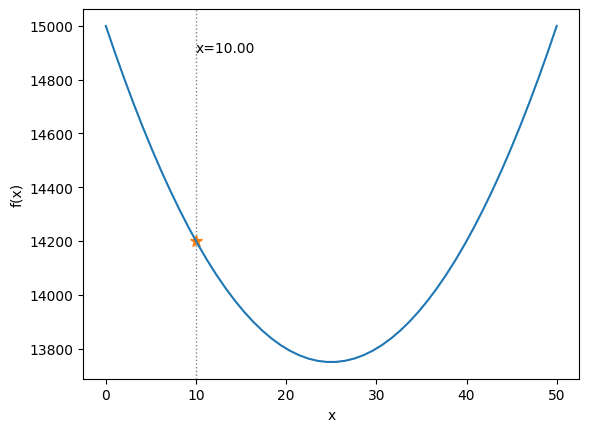

In [31]:
import numpy as np
import matplotlib.pyplot as plt
def drawSysPoint(func, xlim, p):
    x = np.linspace(xlim[0], xlim[1], 50)
    y = func(x)
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Function')
    ax.scatter(p, func(p), marker='*', 
           color='C1', s=75, label=f'Point (x={p:.2f})')
    ax.axvline(p, linestyle=':', linewidth=1, color='gray')
    ax.annotate(text=f'x={p:.2f}',xy=(p,func(1)))   
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.show()
# Example usage
drawSysPoint(system, (0, 50), 10)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
def extract_tangent_line(func, p):
    eps = 1e-6
    x1 = p + eps
    y1 = func(x1)
    x2 = p - eps
    y2 = func(x2)
    slope = (y2 - y1) / (x2 - x1)
    intercept = func(p) - slope * p
    return slope, intercept, lambda x: intercept + slope * x

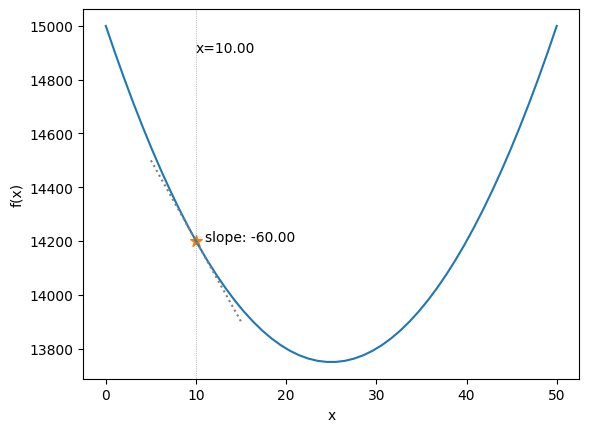

-60.00000034816594

In [44]:
def drawSysPointwTangentLine(func, p):
    xlim = (0, 50)
    x = np.linspace(xlim[0], xlim[1], 50)
    y = func(x)
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Function')
    ax.scatter(p, func(p), marker='*', color='C1', 
           s=75, label=f'Point (x={p:.2f})')
    ax.axvline(p, linestyle=':', linewidth=0.5, color='gray')
    ax.annotate(text=f'x={p:.2f}',xy=(p,func(1)))
    slope, intercept, tangent_line_func = extract_tangent_line(
            func, p)
    tangent_xlim = (p - 5, p + 5)
    x_tangent = np.linspace(tangent_xlim[0], tangent_xlim[1], 50)
    y_tangent = tangent_line_func(x_tangent)
    ax.plot(x_tangent, y_tangent, linestyle=':',
        color='gray', label='Tangent Line')
    ax.annotate(text =f'slope: {slope:.2f}',xy=(p+1,func(p)))
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.show()
    return slope
# Example usage
drawSysPointwTangentLine(system, 10)

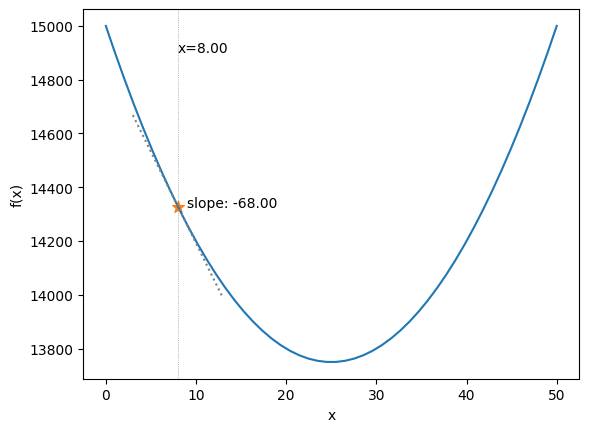

-67.99999939426232


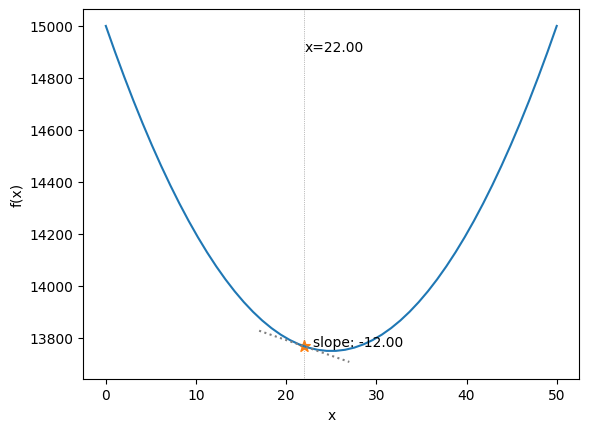

-12.000000412114787


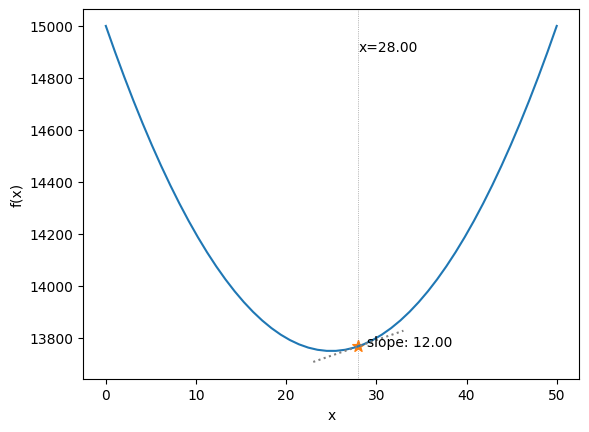

12.000000412114787


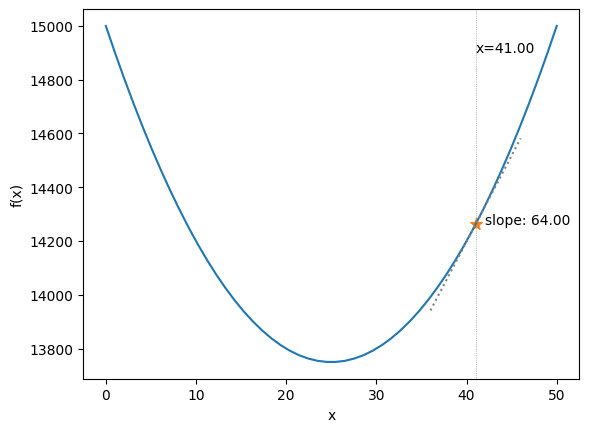

64.0


In [45]:
# Example usage with different points between 0 and 50
points = [8,22, 28, 41]
for p in points:
    print(drawSysPointwTangentLine(system, p))

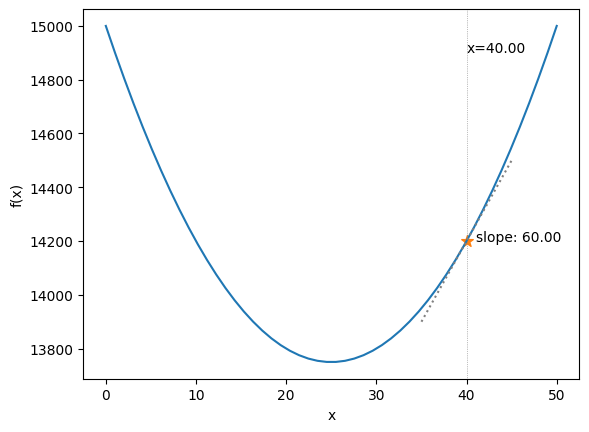

Iteration 1: point = 34.00, 
          slope = 60.00


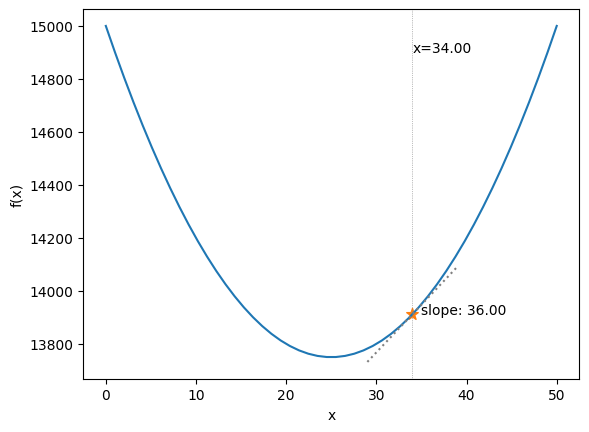

Iteration 2: point = 30.40, 
          slope = 36.00


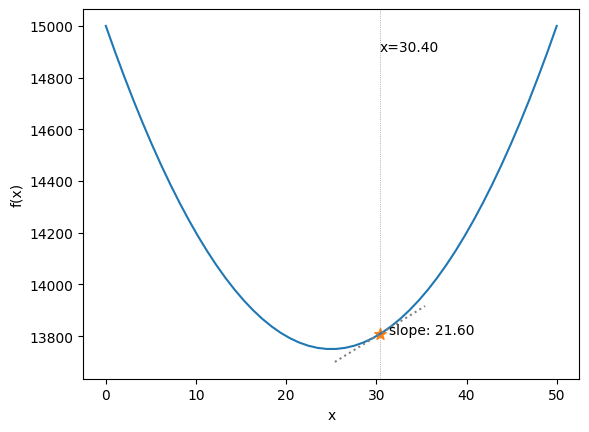

Iteration 3: point = 28.24, 
          slope = 21.60


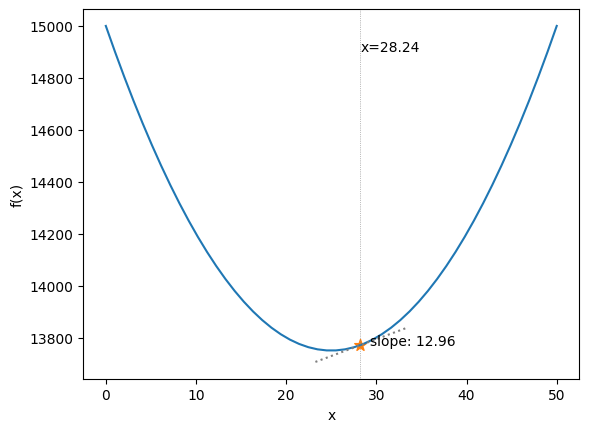

Iteration 4: point = 26.94, 
          slope = 12.96


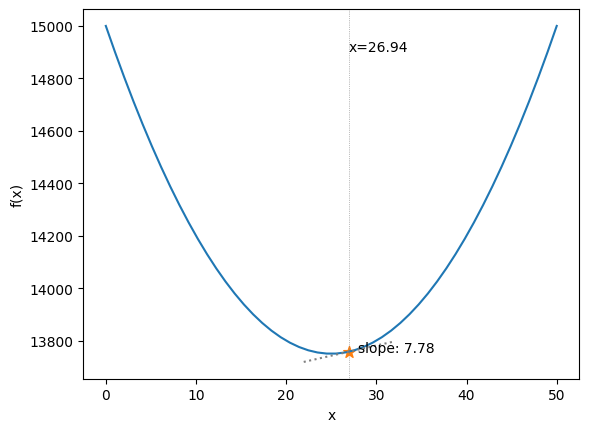

Iteration 5: point = 26.17, 
          slope = 7.78


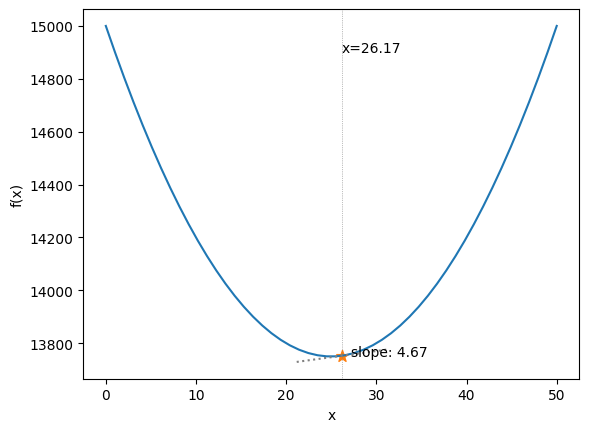

Iteration 6: point = 25.70, 
          slope = 4.67


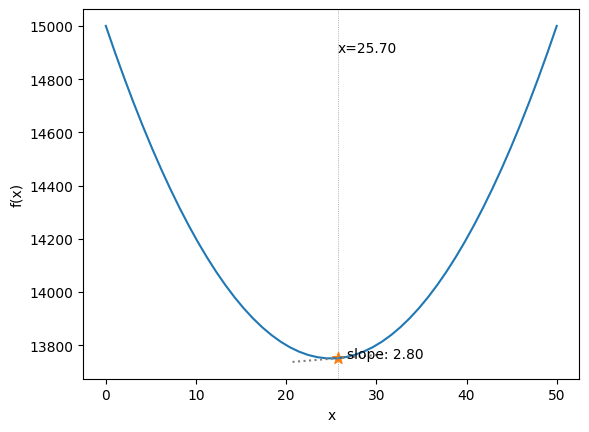

Iteration 7: point = 25.42, 
          slope = 2.80


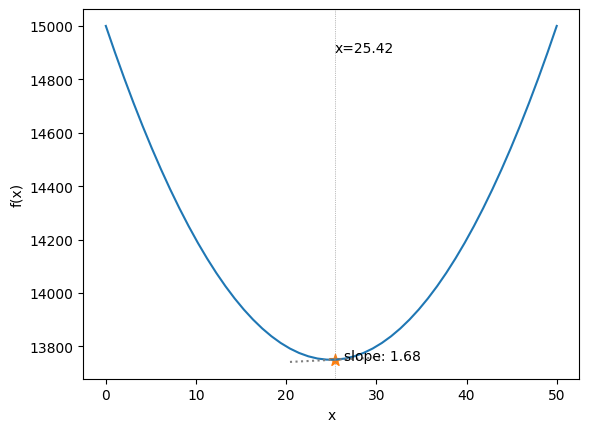

Iteration 8: point = 25.25, 
          slope = 1.68


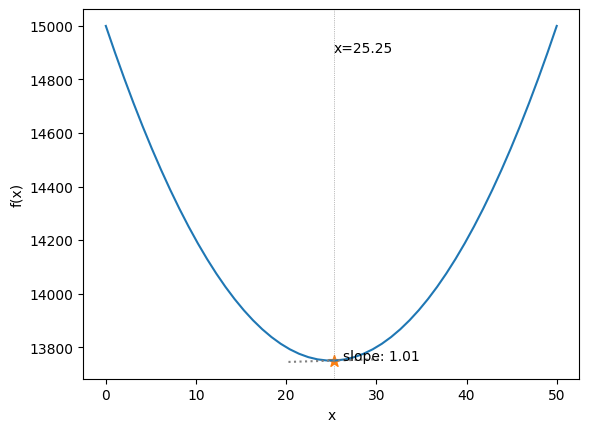

Iteration 9: point = 25.15, 
          slope = 1.01


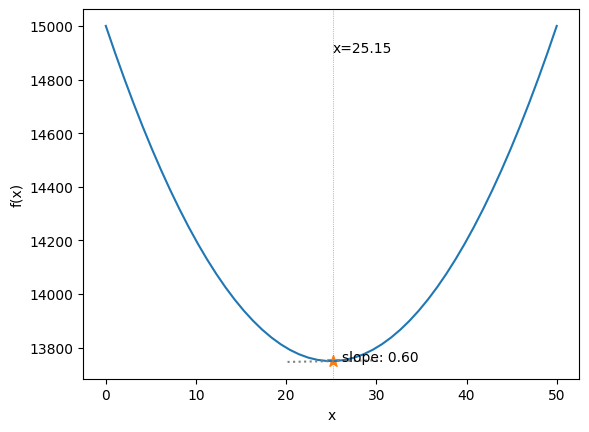

Iteration 10: point = 25.09, 
          slope = 0.60


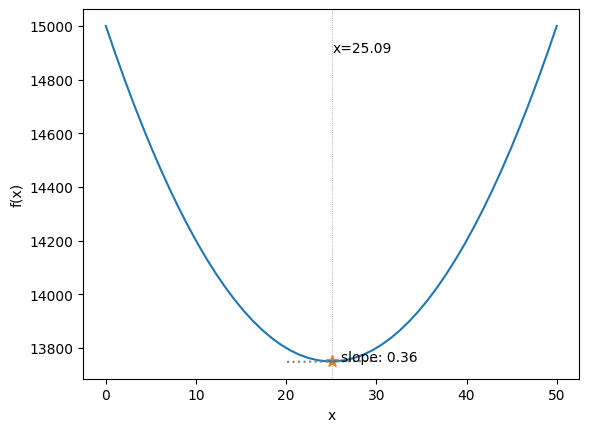

Iteration 11: point = 25.05, 
          slope = 0.36


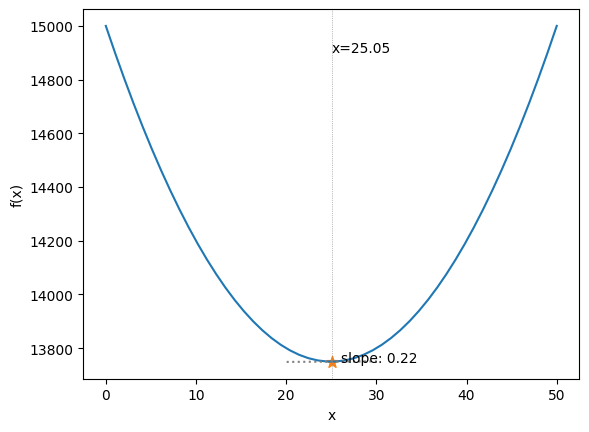

Iteration 12: point = 25.03, 
          slope = 0.22


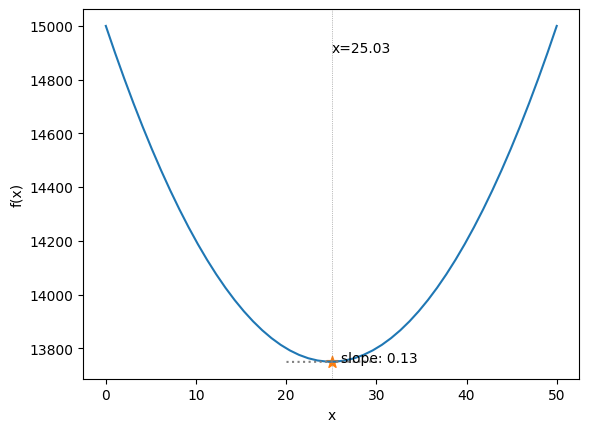

Iteration 13: point = 25.02, 
          slope = 0.13


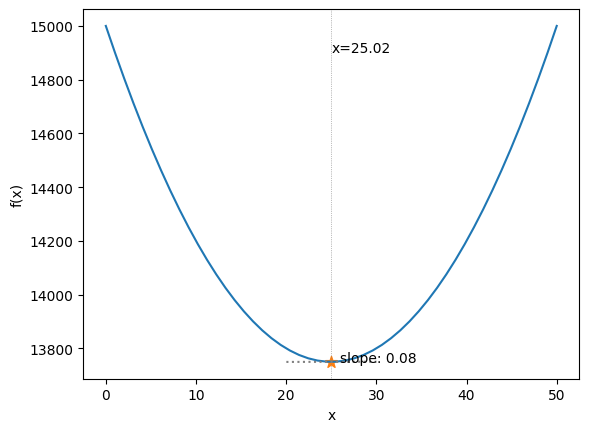

Iteration 14: point = 25.01, 
          slope = 0.08


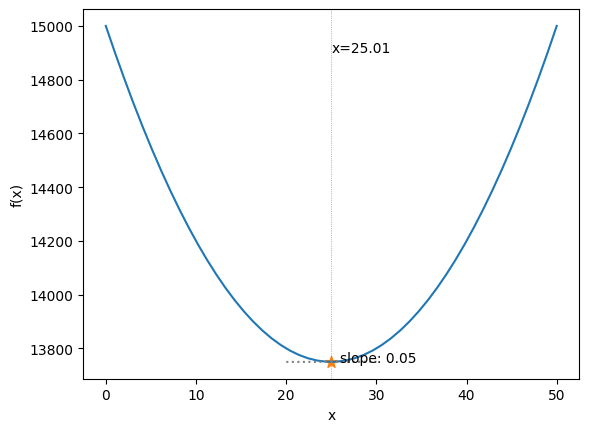

Iteration 15: point = 25.01, 
          slope = 0.05


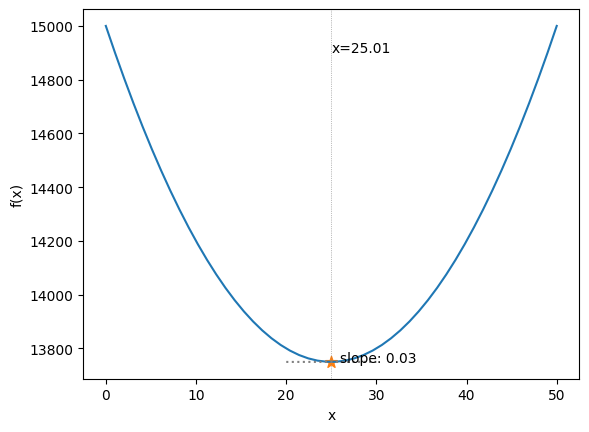

Iteration 16: point = 25.00, 
          slope = 0.03


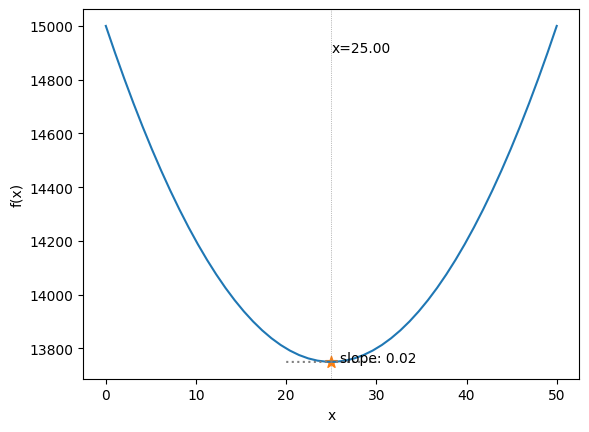

Iteration 17: point = 25.00, 
          slope = 0.02


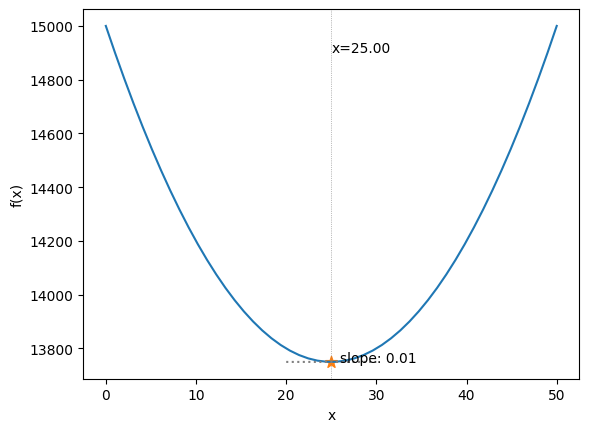

Iteration 18: point = 25.00, 
          slope = 0.01


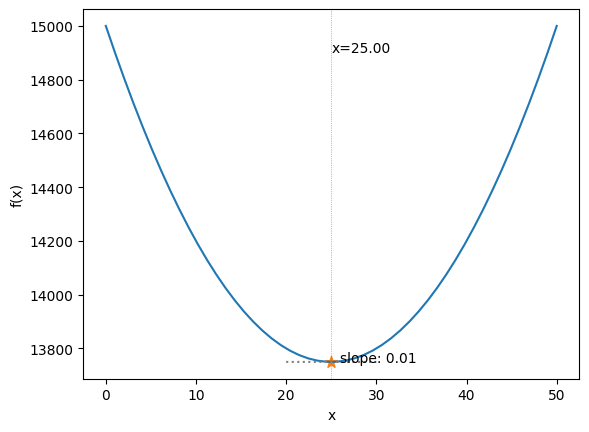

Iteration 19: point = 25.00, 
          slope = 0.01


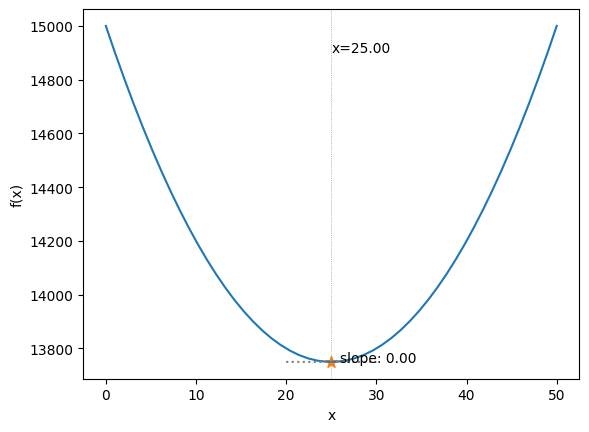

Iteration 20: point = 25.00, 
          slope = 0.00
Converged to: x = 25.00


In [46]:
point = np.random.randint(50)
for i in range(20):
    slope = drawSysPointwTangentLine(system, point)  
    point = point - slope * 0.1
    print(f'''Iteration {i+1}: point = {point:.2f}, 
          slope = {slope:.2f}''')
print(f'Converged to: x = {point:.2f}')

In [47]:
import numpy as np
import time
## Naive method
t0 = time.time()
candidates = np.linspace(0, 50, 501)
answers = []
for c in candidates:
    answers.append(system(c))
answers = np.array(answers)
optimum_naive = candidates[answers == answers.min()]
time_naive = time.time() - t0
print(f'Optimum answer found by Naive Method is {optimum_naive} and it took {time_naive:.2f} seconds.')
## Gradient Descent
t0 = time.time()
point = np.random.randint(50)
for i in range(20):
    slope, intercept, tangent_line_func = extract_tangent_line(
          system, point)
    point = point - slope * 0.1
optimum_gd = point
time_gd = time.time() - t0
print(f'Optimum answer found by Gradient Descent is {optimum_gd:.2f} and it took {time_gd:.2f} seconds.')

Optimum answer found by Naive Method is [25.] and it took 51.69 seconds.
Optimum answer found by Gradient Descent is 25.00 and it took 6.18 seconds.
